# Dolle Arbitrator - Allocentric MF-MB

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
os.chdir(sys.path[0]+"/..")
cwd = os.getcwd()
print(cwd)

C:\Users\jrusp\Desktop\GitHub\mixed-coordination-models\sources


In [2]:
from grid_search import perform_statical_analyses_pearce, perform_statical_analyses_rodrigo
from experimental_data import get_pearce_experimental_data, get_rodrigo_experimental_data
from grid_search import plot_two_perfs, plot_all_perfs, plot_local
from grid_search import random_grid_search, compute_clusters_perfs
from main_pearce import perform_main_pearce, plot_pearce
from rodrigo import perform_rodrigo, plouc
from matplotlib import pyplot as plt
from agents import CombinedAgent
import warnings
warnings.filterwarnings('ignore')

C:\Users\jrusp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Definition of the experimental data to reproduce

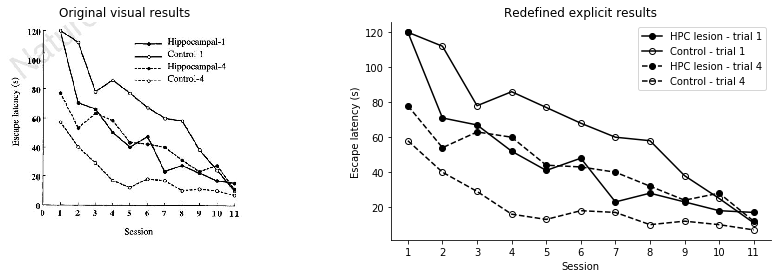

In [3]:
experimental_data_main_pearce = get_pearce_experimental_data()

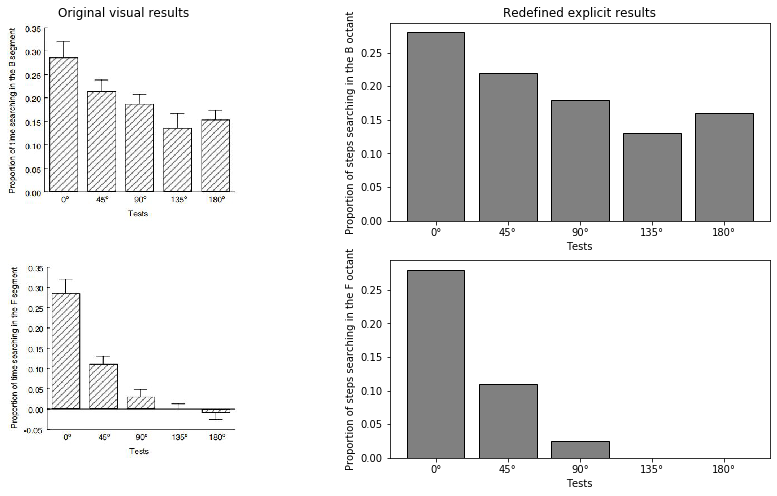

In [4]:
experimental_data_rodrigo = get_rodrigo_experimental_data()

## Hyperparameters optimization of Geerts model on Pearce (1998) and Rodrigo (2006) data

#### Simulation of 2000 datapoints on both experiments

In [5]:
path = "dolle_allo_MB6"

In [5]:
function = "main_pearce"
n_datapoints = 2000
mf_allo = True
dolle = True
HPCmode = "MB"
range_qlr = (0.01, 0.4)
range_eta = (0.01, 0.4)
range_gamma = (0.7, 0.99)
range_inv_temp = (5, 150)
sr_lr = 0.07

random_grid_search(path, function, n_datapoints, mf_allo, dolle, HPCmode, srlr=sr_lr, range_qlr=range_qlr, range_eta=range_eta, range_gamma=range_gamma, range_inv_temp=range_inv_temp)

Directory  ../results/dolle_allo_MB6  already exists


#### Clustering of the mean performances of 2000 local groups of datapoints

In [206]:
compute_clusters_perfs(path, 100, experimental_data_main_pearce, experimental_data_rodrigo, relative=True)

Using 1675 remaining datapoints


#### Removal of clusters that do not validate the required statistical tests

In [207]:
perform_statical_analyses_pearce("dolle_allo_MB6")

Retrieving all agents data
Performing ANOVA


In [208]:
perform_statical_analyses_rodrigo("dolle_allo_MB6")

Retrieving all agents data
Concatenating all data
Computing proximal and distal octants mean occupation on test episodes
Performing statistical analyses


#### Plotting of the sets of parameters associated with the lowest MSE for each 2D bin
White bins means that no datapoints satisfied all the statistical tests

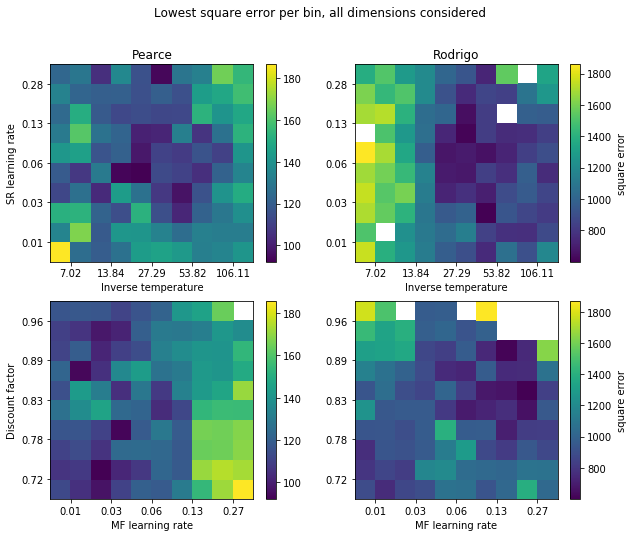

Best three sets of parameters on Pearce's data


,srlr_centroid,qlr_centroid,gamma_centroid,inv_temp_centroid,eta_centroid,se_cluster_pearce,se_cluster_rodrigo_relative
618,0.07,0.02832,0.74560,27.48,0.05308,92.269133,1303.321487
1329,0.07,0.04313,0.78277,20.54,0.05548,93.402634,1297.425833
820,0.07,0.02457,0.88818,40.66,0.22982,93.776896,1437.090927


Best three sets of parameters on Rodrigo's data


,srlr_centroid,qlr_centroid,gamma_centroid,inv_temp_centroid,eta_centroid,se_cluster_pearce,se_cluster_rodrigo_relative
1604,0.07,0.20221,0.84965,46.13,0.03155,205.004860,600.193946
992,0.07,0.15956,0.89615,38.50,0.12414,197.317682,610.498568
1162,0.07,0.16296,0.89942,43.77,0.16750,201.917346,647.964708


In [8]:
res_df = plot_all_perfs(path, size_plot=10, relative=True, mode="dolle")

### Awaited performances of the set of parameters at index 1178 and 1403 on respectively Pearce's and Rodrigo's protocol

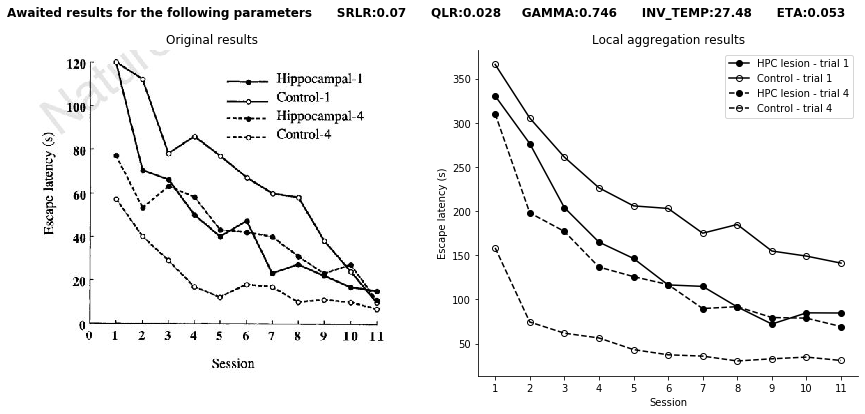

In [9]:
plot_local("main_pearce", res_df, 618)

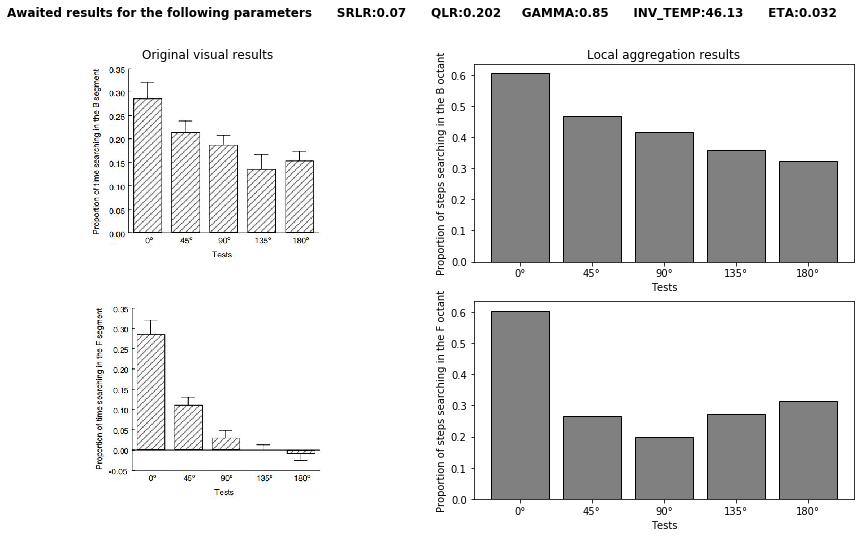

In [10]:
plot_local("rodrigo", res_df, 1604)

# Testing the grid-search predictions: Pearce, Roberts, Good (1998) experiment

## Control agents training

In [12]:
maze_size = 10
n_sessions = 11
n_trials = 4
n_agents = 100
mf_allo = True
sr_lr = 0.07
q_lr = 0.028
inv_temp_gd = 27
inv_temp_mf = 27
arbi_inv_temp = 27
gamma = 0.745
eta = 0.053 # reliability learning rate
alpha1 = 0.01
beta1 = 0.1
A_alpha = 3.2 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 
landmark_dist = 4
HPCmode = "MB"
time_limit = 500
starting_points = [243,230,270,257]
lesion_HPC = False
lesion_DLS = False
dolle = True

Two-way ANOVA on trial and session

                           sum_sq      df           F         PR(>F)
C(session)           8.006699e+06    10.0   99.155497  1.151862e-185
C(trial)             1.341880e+07     3.0  553.930979  5.773826e-305
C(session):C(trial)  1.235717e+06    30.0    5.101068   4.668748e-18
Residual             3.517423e+07  4356.0         NaN            NaN


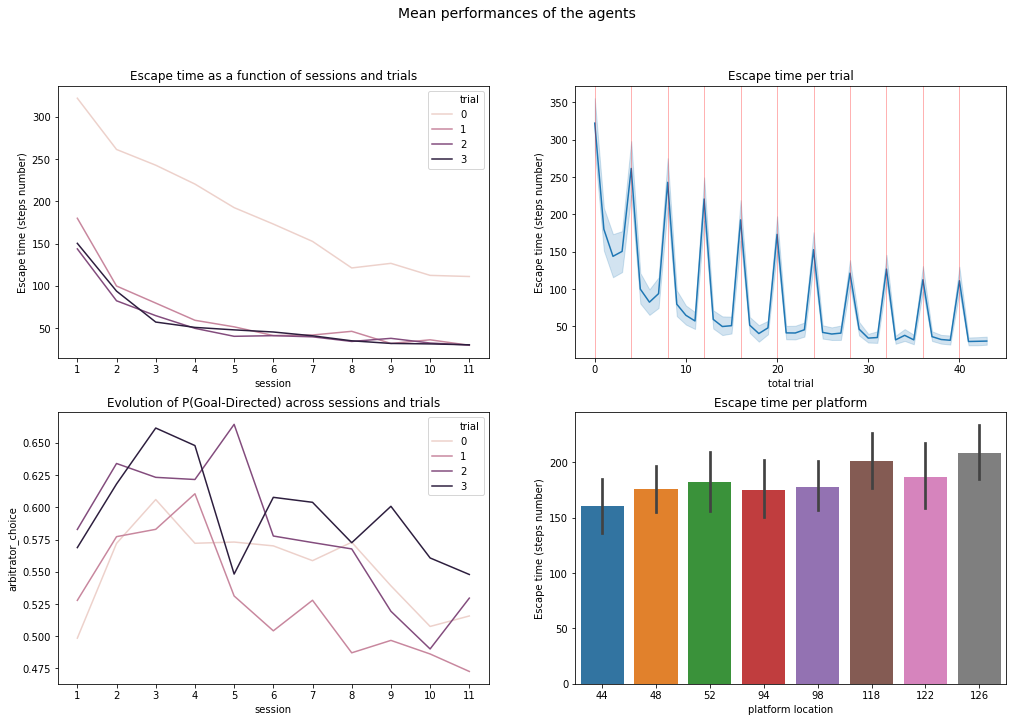

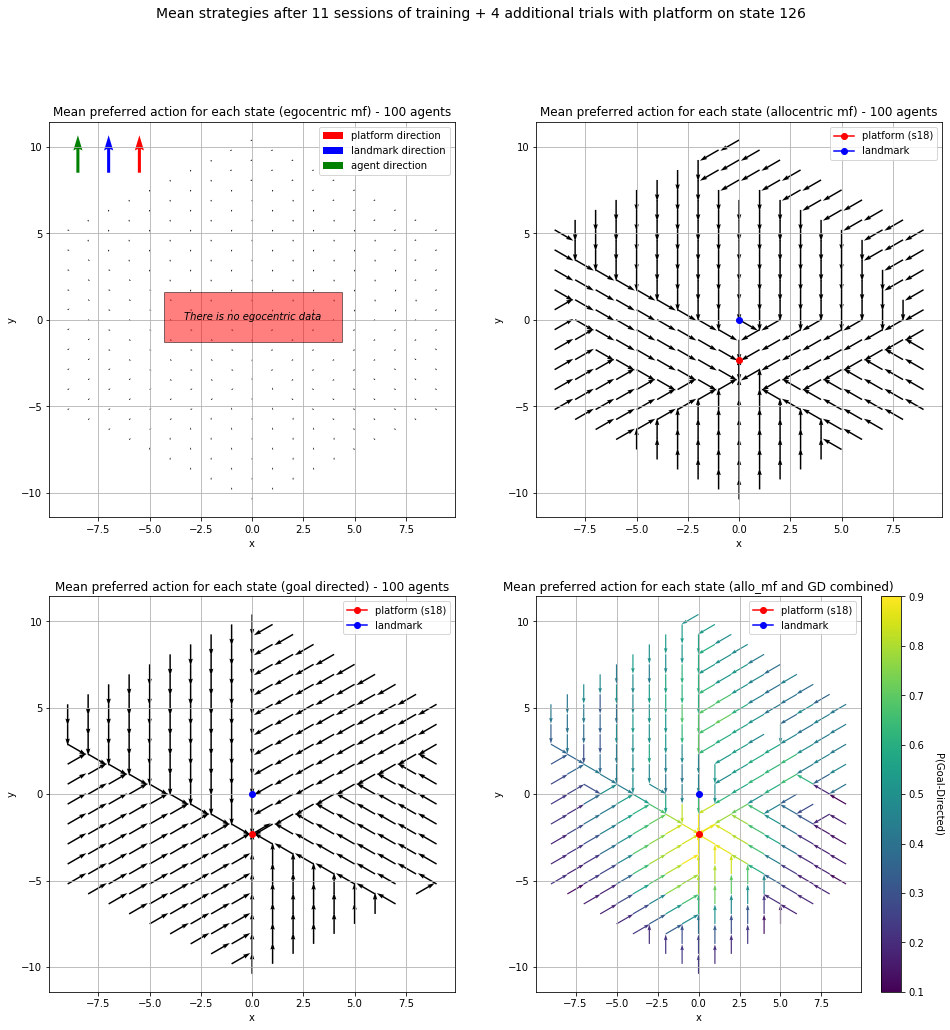

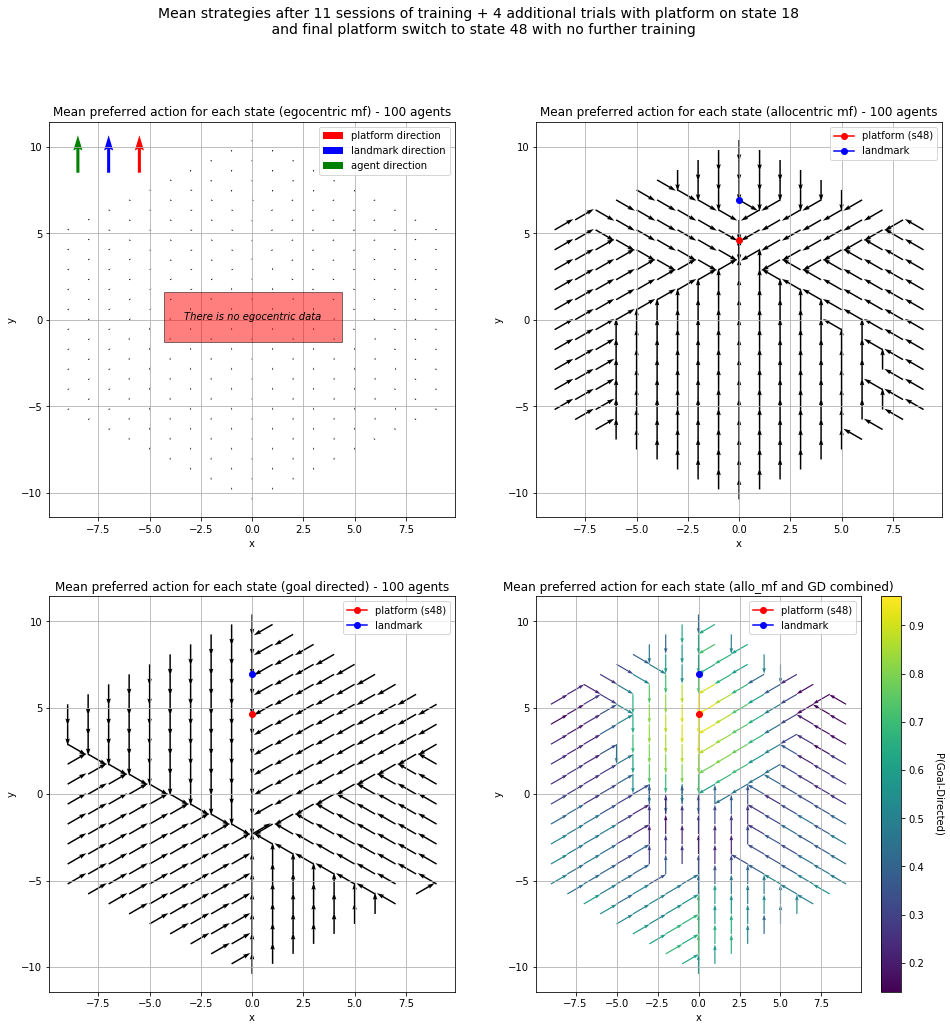

In [7]:
perform_main_pearce(maze_size, n_trials, n_sessions, 100, mf_allo, sr_lr, q_lr, gamma, eta, alpha1, beta1, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points, lesion_HPC, lesion_DLS, dolle, inv_temp_gd = inv_temp_gd, inv_temp_mf = inv_temp_mf, arbi_inv_temp = arbi_inv_temp)

## Lesioned agents training
#### Below are the performances of the model that always select the DLS strategy when the HPC is lesioned

In [13]:
lesion_HPC = True

Two-way ANOVA on trial and session

                           sum_sq      df           F        PR(>F)
C(session)           3.042965e+07    10.0  254.563879  0.000000e+00
C(trial)             4.084605e+05     3.0   11.390130  1.942125e-07
C(session):C(trial)  5.073221e+05    30.0    1.414694  6.650014e-02
Residual             5.207005e+07  4356.0         NaN           NaN


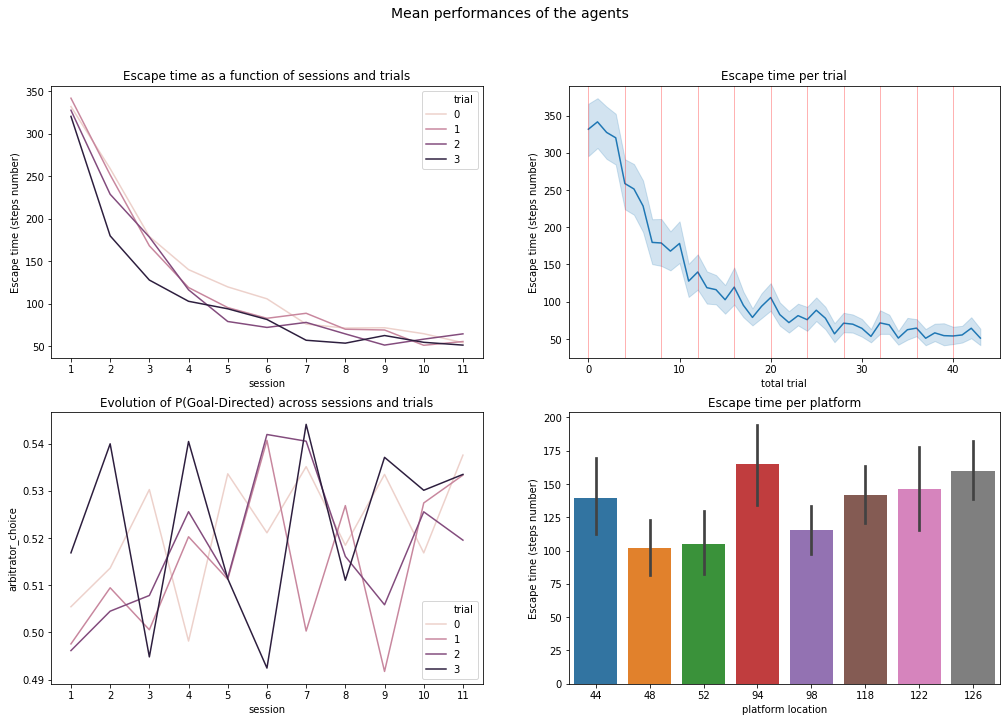

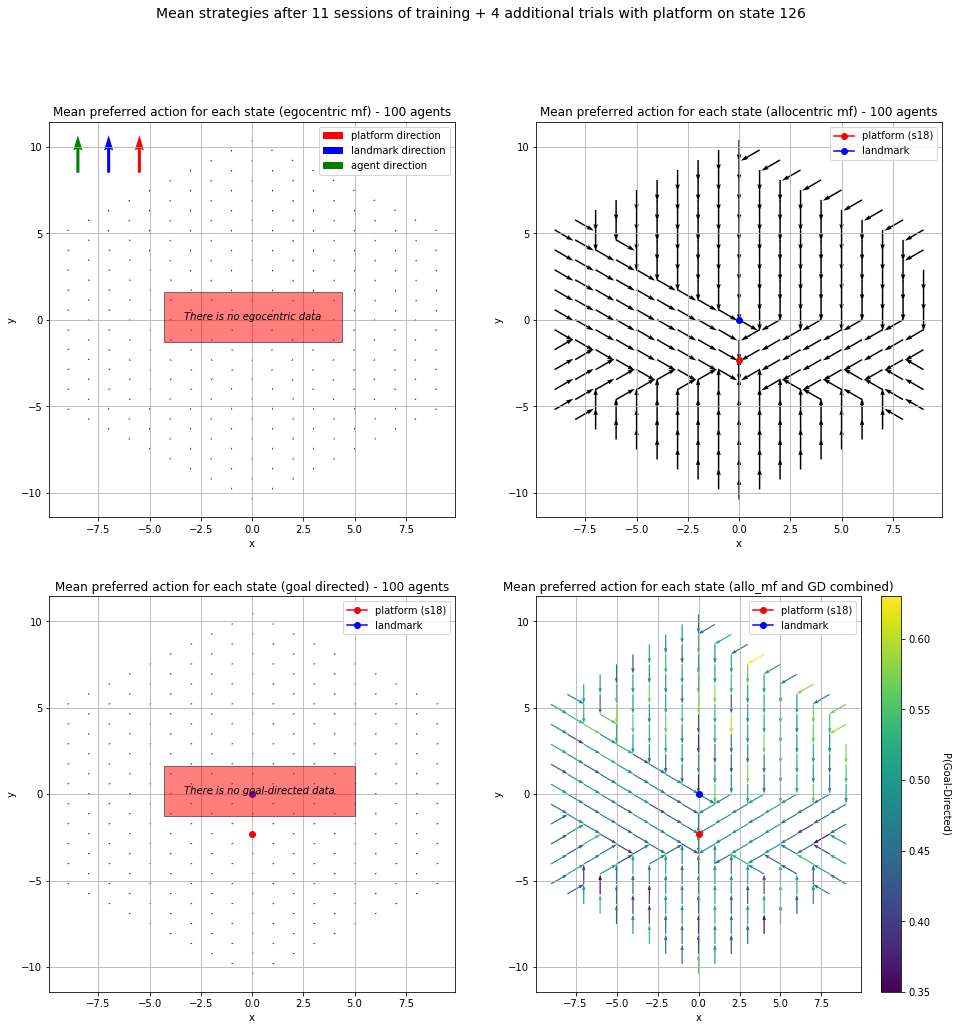

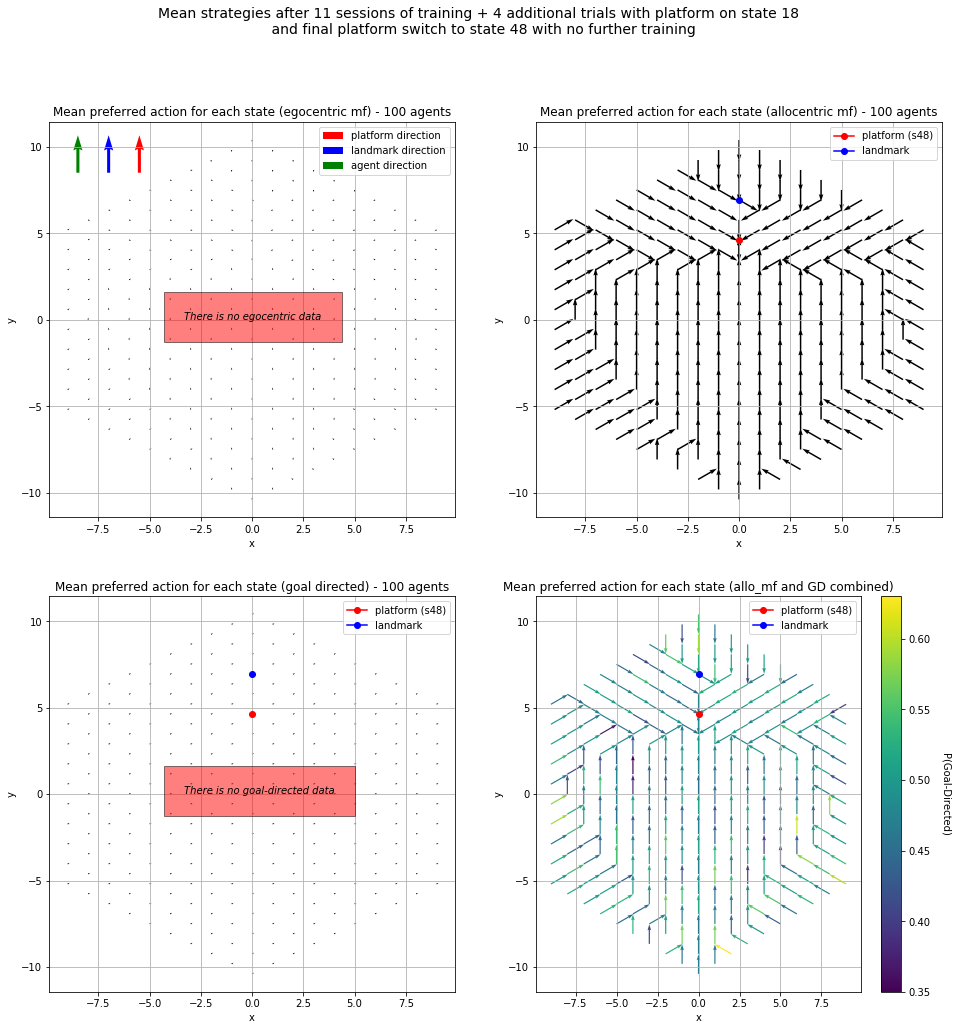

In [14]:
perform_main_pearce(maze_size, n_trials, n_sessions, 100, mf_allo, sr_lr, q_lr, gamma, eta, alpha1, beta1, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points, lesion_HPC, lesion_DLS, dolle, inv_temp_gd = inv_temp_gd, inv_temp_mf = inv_temp_mf, arbi_inv_temp = arbi_inv_temp,lesion_PFC=True)

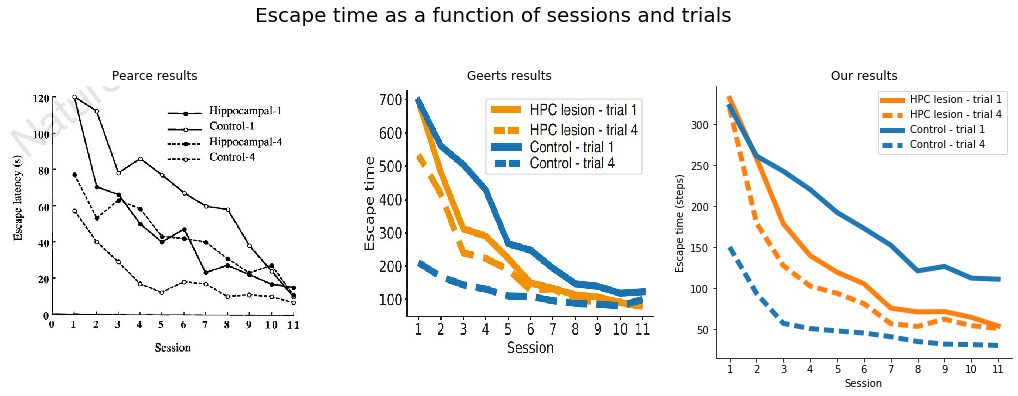

In [13]:
plot_pearce(maze_size, n_trials, n_sessions, 100, mf_allo, sr_lr, q_lr, gamma, eta, alpha1, beta1, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points, dolle, inv_temp_gd = inv_temp_gd, inv_temp_mf = inv_temp_mf, arbi_inv_temp = arbi_inv_temp)

#### Additional info: Performances of the model that need to learn to select the DLS strategy when the HPC is lesioned

9751.992395575486


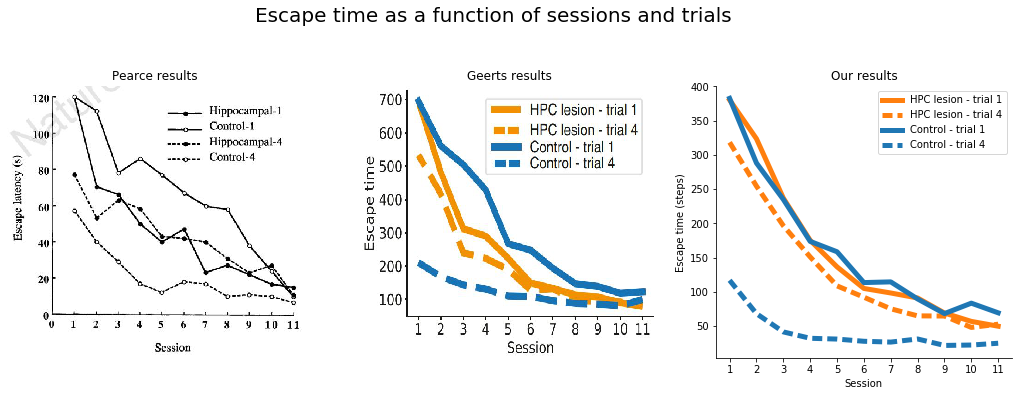

In [194]:
plot_pearce(maze_size, n_trials, n_sessions, 100, mf_allo, sr_lr, q_lr, gamma, eta, alpha1, beta1, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points, dolle, inv_temp_gd = inv_temp_gd, inv_temp_mf = inv_temp_mf, arbi_inv_temp = arbi_inv_temp)

# Testing the grid-search predictions: Rodrigo (2006) experiment

In [14]:
n_agents = 100
mf_allo = True
sr_lr = 0.07
q_lr = 0.20
inv_temp_gd = 46
inv_temp_mf = 46
arbi_inv_temp = 46
gamma = 0.86
eta = 0.031 # reliability learning rate
alpha1 = 0.01
beta1 = 0.1
A_alpha = 3.2 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 
landmark_dist = 0
HPCmode = "MB"
time_limit = 500
starting_points = [243,230,270,257]
lesion_HPC = False
lesion_DLS = False
dolle = True

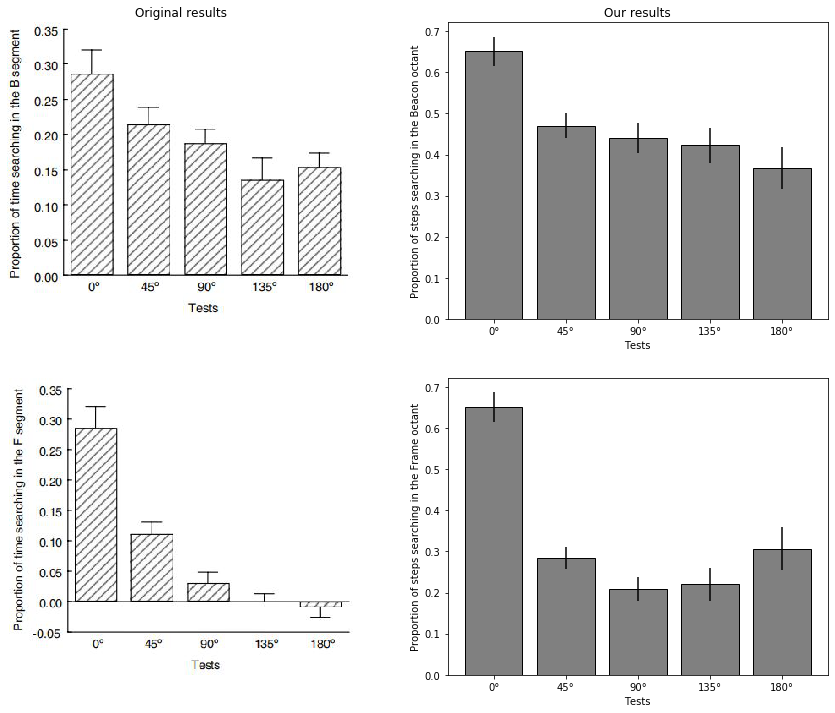

Concatenating all data
Computing proximal and distal octants mean occupation on test episodes
Performing statistical analyses
Helmert tests
p < 0.05 on 0° versus others (proximal beacon):  True
p < 0.05 on 45° versus others (proximal beacon):  True
p < 0.05 on 90° versus others (proximal beacon):  False
p < 0.05 on 0° versus others (distal beacon):  True
p < 0.05 on 45° versus others (distal beacon):  True
p < 0.05 on 90° versus others (distal beacon):  True

ANOVAS
Effect of angle on proximal beacon's octant occupation:  True
Effect of angle on distal beacon's octant occupation:  True

TTESTS
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Proximal beacon's octant occupation different from chance:  True
Distal beacon's octant occupation different from chance:  True
Distal beac

In [15]:
perform_rodrigo(n_agents, mf_allo, sr_lr, q_lr, gamma, eta, alpha1, beta1, A_alpha, A_beta, landmark_dist, HPCmode, time_limit, starting_points, lesion_HPC, lesion_DLS, dolle, inv_temp_gd = inv_temp_gd, inv_temp_mf = inv_temp_mf, arbi_inv_temp = arbi_inv_temp)